<font size=10><b>Data visualization Data Preprocessing</b></font> 


# Meaningful graphs

### Features’ explanation:
<b>Region:</b> Countries were divided in 8 regions; it’s not perfect… if you disagree, please modify them
<br><b>Population:</b> Total population of the country
<br><b>Colonizer:</b> The colonial power, if there is, that colonized the country. It’s related to European countries and the US, occupations weren’t considered, like Japan over Korea, etc. When a country was colonized by 2 powers (All former German colonies in Africa for example), the most recent was taken.
<br><b>Civil Freedom:</b> (Source UN) 4 categories, free, partially free, not free and no info.
<br><b>Press Freedom:</b> (Source UN) 6 categories: very serious situation, difficult situation, noticeable problems, good situation, satisfactory situation and no info.
<br><b>Democracy:</b> (Source UN) 5 categories, hybrid regime, authoritarian regime, flawed democracy, full democracy and no
info.
<br><b>Urban Population (%):</b> The percentage of the population that lives in urban areas
<br><b>GDP P/C: </b>(Source IMF) GDP per capita in US dollars
<br><b>Unemployment:</b> Percentage of unemployment
<br><b>Inequality Index:</b> Gini coefficient, is a measure of statistical dispersion intended to represent the income or wealth distribution of a nation's residents, and is the most commonly used measurement of inequality.
<br><b>PPP:</b> Purchasing power parity (PPP) is a way of measuring economic variables in different countries so that irrelevant exchange rate variations do not distort comparisons. Purchasing power exchange rates are such that it would cost exactly the same number of, for example, US dollars to buy euros and then buy a basket of goods in the market as it would cost to purchase the same goods directly with dollars. The purchasing power exchange rate used in this conversion equals the ratio of the currencies' respective purchasing powers (reciprocals of their price levels).
<br><b>Homicide rate:</b> Homicides per 100k inhabitants
<br><b>HDI:</b> The Human Development Index (HDI) is a statistic composite index of life expectancy, education, and per capita income indicators
<br><b>Immigrants (Ratio):</b> Ratio of the population that was not born in that country
<br><b>Emigrants (Ratio):</b> Ratio of the population that was born in that country and currently does not live there
<br><b>Tax to profit %:</b> (Source doing business 2019) The average tax that a company pays for their profit

# Exercise:
#### Given Countries.csv, pick the features you consider relevant and show the information in meaningful graphs. 
##### Only looking at the graph we need to be able to notice your conclusion.
##### Make 5 graphs, 3 that show global statistics and 2 that show something respecting your country of origin. Try to variate the type, pie plot, box plot, vertical bar, table, etc.
    (*) If you think some important feature is missing, you are more than welcome to add it
    (**) Some countries don’t provide certain information, so the voids were filled with the region’s average. Countries with too many missing values were dropped, North Korea for example
    (***) And some countries, of course, they lie or pass years without providing data… Very common in Latin America and Africa, so take it into account

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from bubble_plot.utils import describe_categorical_values
import cufflinks as cf
import plotly
import chart_studio.plotly 
import plotly.tools 
import plotly.graph_objs as go
chart_studio.tools.set_credentials_file(username='fatima999', api_key='zqQotRf6G3m89hAuTZ17')
from bubble_plot.bubble_plot import bubble_plot


In [2]:
df = pd.read_csv('~/Documents/Visualization/Countries.csv')
df.head(2)

,Index,Country,Population,Zone,Colonizer,Civil Freedom,Press Freedom,Democracy,Urban Population (%),Immigrants (Ratio),Emigrants (Ratio),GDP PP/C,Unemployment,Inequality Index,PPP,Homicide rate,HDI,Tax to profit %
0,0,AFGHANISTAN,35530081,South Asia,None,not free,difficult situation,authoritarian regime,25.5,0.00,0.13,2017.0,23.9,27.8,1.57,6.35,0.50,71.4
1,1,ALBANIA,2930187,Eastern Europe & Central Asia,None,partly free,noticeable problems,hybrid regime,60.3,0.03,0.28,13345.0,12.5,29.0,2.51,2.70,0.79,37.3


##### Let's see Summary statistics

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Index                 189 non-null    int64  
 1   Country               189 non-null    object 
 2   Population            189 non-null    int64  
 3   Zone                  189 non-null    object 
 4   Colonizer             189 non-null    object 
 5   Civil Freedom         184 non-null    object 
 6   Press Freedom         176 non-null    object 
 7   Democracy             159 non-null    object 
 8   Urban Population (%)  189 non-null    float64
 9   Immigrants (Ratio)    189 non-null    float64
 10  Emigrants (Ratio)     189 non-null    float64
 11  GDP PP/C              189 non-null    float64
 12  Unemployment          189 non-null    float64
 13  Inequality Index      188 non-null    float64
 14  PPP                   189 non-null    float64
 15  Homicide rate         1

And a little look inside the numeric features:

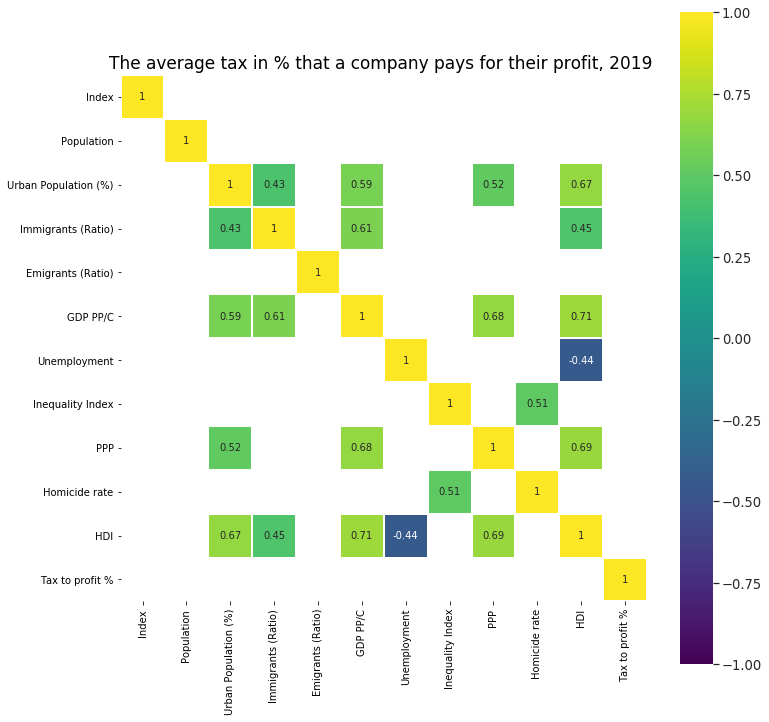

In [4]:
corr = df.corr() 
f = plt.figure(figsize=(10, 10))
plt.title ("The average tax in % that a company pays for their profit, 2019 ", fontsize=17)
sns.set(font_scale=1.2)
plt.tight_layout()
sns.heatmap(corr[(corr >= 0.4) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=1,
            annot=True, annot_kws={"size": 10}, square=True);


We see the strong and high correlated features here

Let's rename the column `Tax to profit %`, next time it will be easier to call it

In [5]:
df.rename(columns={'Tax to profit %': 'tax_to_profit_persent'}, inplace=True)

##### And now, look at the distribution of tax_to_profit_persent by the countries

In [6]:
df[['tax_to_profit_persent','Country','Zone']].sort_values(["tax_to_profit_persent","Zone"],
                                                               ascending = (False))

,tax_to_profit_persent,Country,Zone
36,219.6,COMOROS,Sub-Saharan Africa
5,106.0,ARGENTINA,Latin America & Caribbean
43,100.0,CUBA,Latin America & Caribbean
53,83.7,ERITREA,Sub-Saharan Africa
19,83.7,BOLIVIA,Latin America & Caribbean
...,...,...,...
138,11.3,QATAR,Middle East & North Africa
169,11.2,TIMOR-LESTE,East Asia & Pacific
62,9.9,GEORGIA,Eastern Europe & Central Asia
182,8.5,VANUATU,East Asia & Pacific


We can plot it on the world map

In [7]:
data = dict(
        type = 'choropleth',
        colorscale = 'bluered_r',
        reversescale = True,
        locations = df['Country'],
        locationmode = "country names",
        z = df['tax_to_profit_persent'],
        text = df['Country'],
        colorbar = {'title' : 'Tax to profit %'},
        zmin = 0,
        zmax = 100
      ) 
layout=dict(title_text = 'The average tax in % that a company pays for their profit, 2019 ')
fig = go.Figure(data=data,layout=layout)
chart_studio.plotly.iplot(fig, filename='choropleth')

Well, here we see that some countries, colored with red, have a very high percent of average tax for profit. We can press the buttom `edit chatr` and will be able to zoom the picture and to see:

    countries 
    COMOROS	
	ARGENTINA	has the value of this feature over 200% and 100% accordinaly
    
    and
    CUBA	
	ERITREA	
	BOLIVIA	
	EQUATORIAL has the value over 60%
    
And to see it better we can on the boxplot

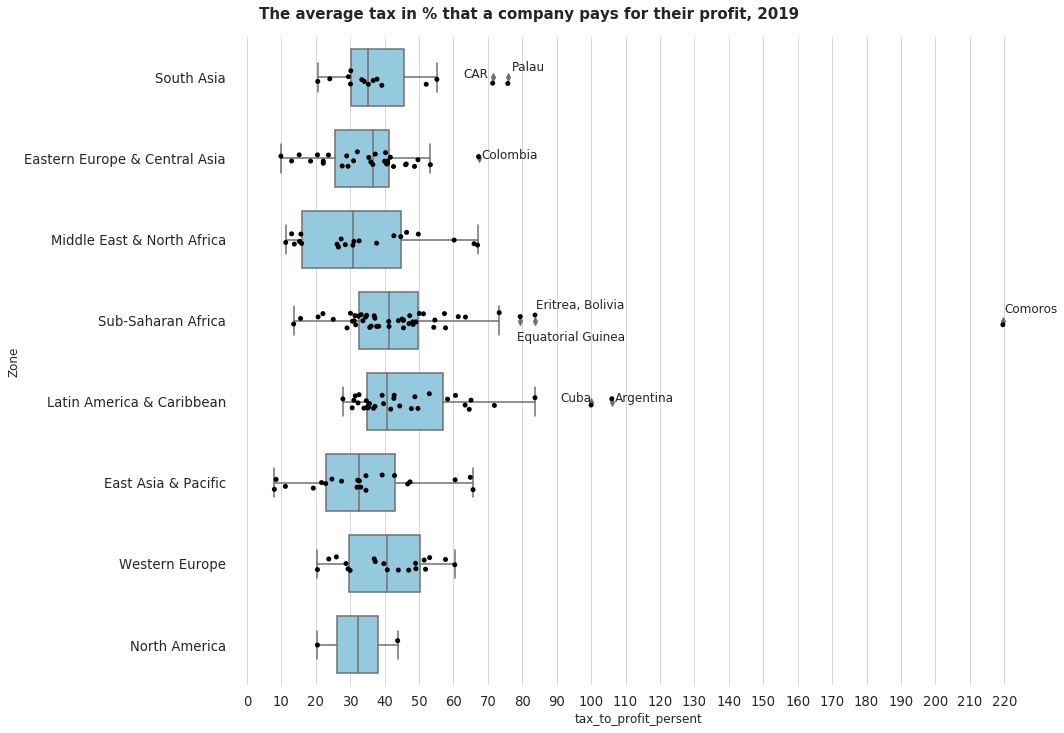

In [8]:
f,ax = plt.subplots(figsize = (15,10))
f.suptitle("The average tax in % that a company pays for their profit, 2019 ",
             fontsize=15, fontweight='bold',y=1.02)
g1 = sns.boxplot(x=df.tax_to_profit_persent,y=df.Zone,data=df,color='skyblue', width=0.7)
g2 = sns.stripplot(x=df.tax_to_profit_persent ,y=df.Zone,color='black', s=5)

ax.xaxis.get_label().set_fontsize(12)
ax.yaxis.get_label().set_fontsize(12)

ax.annotate("Comoros", xy=(220, 3),xytext=(220, 2.9), fontsize=12);
ax.annotate("Argentina", xy=(106.0, 5),xytext=(107.0, 4), fontsize=12);
ax.annotate("Cuba", xy=(100, 5),xytext=(91, 4), fontsize=12);
ax.annotate("Eritrea, Bolivia", xy=(85.7, 3),xytext=(84, 2.85), fontsize=12);
ax.annotate("Equatorial Guinea", xy=(79.4, 3),xytext=(78.5, 3.25), fontsize=12)
ax.annotate("Palau", xy=(75.8, 0), xytext=(77, -0.08), fontsize=12);
ax.annotate("CAR", xy=(73.3, 0),xytext=(63.0, 0), fontsize=12);
ax.annotate("Colombia", xy=(71.9, 1),xytext=(68, 1), fontsize=12);

plt.tight_layout()
ax.xaxis.set_ticks(np.arange(0, 230, 10))
plt.grid(axis='x',which='major',color='grey', alpha=0.3)
plt.box(on=None)
plt.show()


 1. We see, that in Noth America only 2 countries represents the region zone
 2. Comoros has a very high (about 219%) tax_to_profit rate
 3. Also Argentina and Cuba has high rate (106% and 100%), but less than Comoros
 
#### Let's check the world Unemployment percentile

In [9]:
df_unemp = df[['Unemployment','Country','Zone']].sort_values(["Unemployment"],
                                                               ascending = (False))
df_unemp.head(30)

,Unemployment,Country,Zone
188,50.00,ZIMBABWE,Sub-Saharan Africa
164,50.00,SYRIA,Middle East & North Africa
145,48.00,SENEGAL,Sub-Saharan Africa
46,40.00,DJIBOUTI,Middle East & North Africa
88,38.20,KIRIBATI,East Asia & Pacific
108,36.00,MARSHALL ISLANDS,East Asia & Pacific
186,35.00,YEMEN,Middle East & North Africa
119,34.00,NAMIBIA,Sub-Saharan Africa
183,33.30,VENEZUELA,Latin America & Caribbean
185,28.45,PALESTINE,Middle East & North Africa


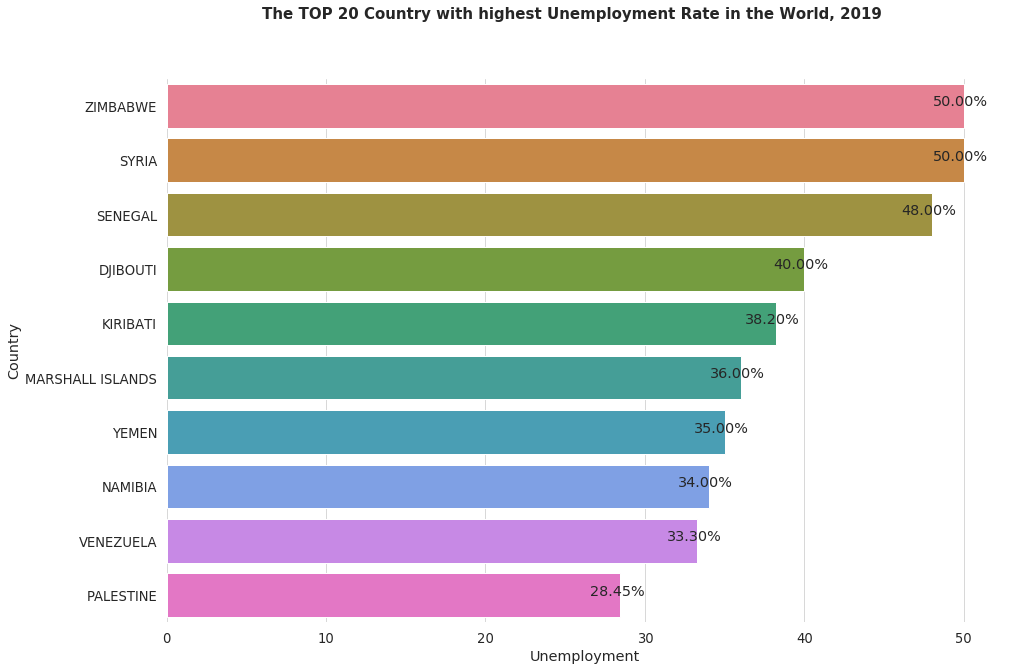

In [10]:
fig = plt.figure(figsize=(15,10))
fig.suptitle("The TOP 20 Country with highest Unemployment Rate in the World, 2019",
             fontsize=15, fontweight='bold')
graph = sns.barplot(x=df_unemp.Unemployment[:10], y=df_unemp.Country[:10],palette='husl')
for p in graph.patches:
    width = p.get_width()
    graph.text(width -0.2  ,
            p.get_y()+p.get_height()/2. ,
            '{:1.2f}%'.format(width),
            ha="center")
plt.grid(axis='x',which='major',color='grey', alpha=0.3)
plt.box(on=None)
plt.show()

We see on this plot the Top 20 is stops on 50% maximum and almost 30% minimum(28.45%)
 
 Let's look by the way on TOP 10 countries with the lowest Unemployment

In [11]:
df_unemp.sort_values(["Unemployment","Zone"], ascending = (True), inplace=True)
df_unemp.head(20)

,Unemployment,Country,Zone
28,0.3,CAMBODIA,East Asia & Pacific
168,0.7,THAILAND,South Asia
93,1.5,LAOS,South Asia
177,1.6,UNITED ARAB EMIRATES,Middle East & North Africa
129,1.7,PALAU,South Asia
44,1.9,CZECH REPUBLIC,Eastern Europe & Central Asia
34,2.0,CHINA,East Asia & Pacific
91,2.1,KUWAIT,Middle East & North Africa
184,2.2,VIETNAM,South Asia
67,2.3,GUATEMALA,Latin America & Caribbean


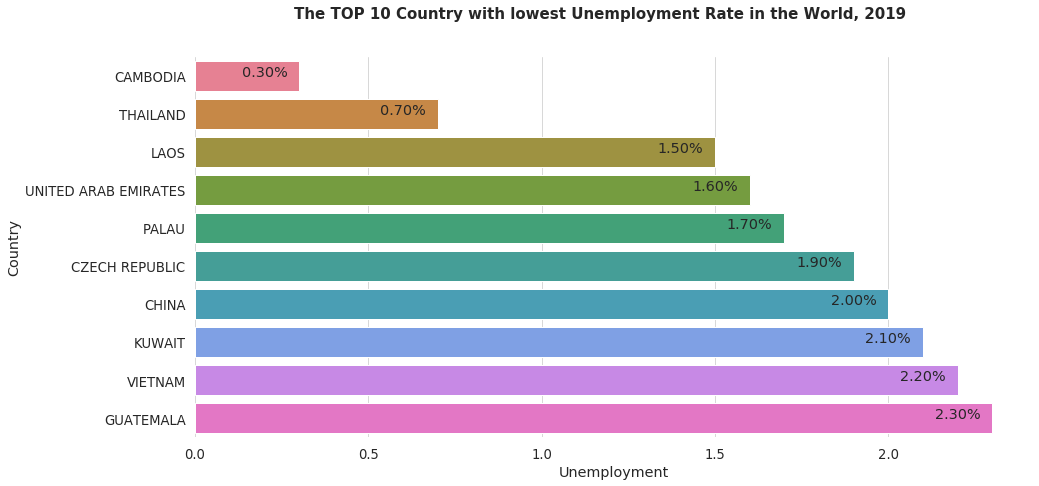

In [12]:
fig = plt.figure(figsize=(15,7))
fig.suptitle("The TOP 10 Country with lowest Unemployment Rate in the World, 2019",
             fontsize=15, fontweight='bold')
graph = sns.barplot(x=df_unemp.Unemployment[:10], y=df_unemp.Country[:10],palette='husl')
for p in graph.patches:
    width = p.get_width()
    graph.text(width -0.1  ,
            p.get_y()+p.get_height()/2. ,
            '{:1.2f}%'.format(width),
            ha="center")
plt.grid(axis='x',which='major',color='grey', alpha=0.3)
plt.box(on=None)
plt.show()

After such statistial plots i have the only one question: how do those countries survived with the 50% Unemployment?

##### Lets look closer on the situation with my country i came from, `Ukraine`

In [13]:
df[df.Country == 'UKRAINE']

,Index,Country,Population,Zone,Colonizer,Civil Freedom,Press Freedom,Democracy,Urban Population (%),Immigrants (Ratio),Emigrants (Ratio),GDP PP/C,Unemployment,Inequality Index,PPP,Homicide rate,HDI,tax_to_profit_persent
176,176,UKRAINE,44222947,Eastern Europe & Central Asia,None,partly free,noticeable problems,hybrid regime,69.4,0.11,0.12,9283.0,9.7,25.5,4.07,6.34,0.75,41.7


I was born when `Ukrain` still was the part of ex USSR, so the `Democracy` was on the point `authoritarian regime`. In 1991 Ukraine came out of that comunity and became independent, democratical country (as we thought at first that time). But now, after almost 30 years of `independency` as ukrainian people say, we can check where it is now in democracy rate (the country). 

We have about 70% urban population there, so i would like to compare the same countries depending on their democracy regime

Let's remove nan values from `Democracy` feature

In [14]:
df.Democracy.fillna('unknown', inplace=True)

In [15]:
df.Democracy.isna().sum()

0

Let's look at the table of  `top 5` countries with  `Urban Population (%)` according the `Democracy` regime == `hybrid regime`

In [16]:
df[df.Democracy == 'hybrid regime'].sort_values(["Urban Population (%)"], ascending = (False)).head()

,Index,Country,Population,Zone,Colonizer,Civil Freedom,Press Freedom,Democracy,Urban Population (%),Immigrants (Ratio),Emigrants (Ratio),GDP PP/C,Unemployment,Inequality Index,PPP,Homicide rate,HDI,tax_to_profit_persent
95,95,LEBANON,6082357,Middle East & North Africa,France,partly free,noticeable problems,hybrid regime,88.6,0.33,0.12,14684.00,10.00,26.31,3.58,3.99,0.76,31.1
185,185,PALESTINE,4920724,Middle East & North Africa,UK,not free,difficult situation,hybrid regime,76.2,0.06,0.44,25302.95,28.45,35.50,2.42,0.69,0.69,15.3
174,174,TURKEY,80745020,Eastern Europe & Central Asia,None,not free,difficult situation,hybrid regime,75.1,0.04,0.04,27956.00,10.30,41.90,8.20,4.31,0.79,40.9
79,79,IRAQ,38274618,Middle East & North Africa,UK,not free,very serious situation,hybrid regime,70.5,0.00,0.04,17659.00,16.00,29.50,2.51,2.20,0.69,30.8
176,176,UKRAINE,44222947,Eastern Europe & Central Asia,None,partly free,noticeable problems,hybrid regime,69.4,0.11,0.12,9283.00,9.70,25.50,4.07,6.34,0.75,41.7


And now we can plot Ukraun position of  Urban Population (%) accordint the Democracy regime. I will point(annotate) the only one country, that we are want to see here and some near it.

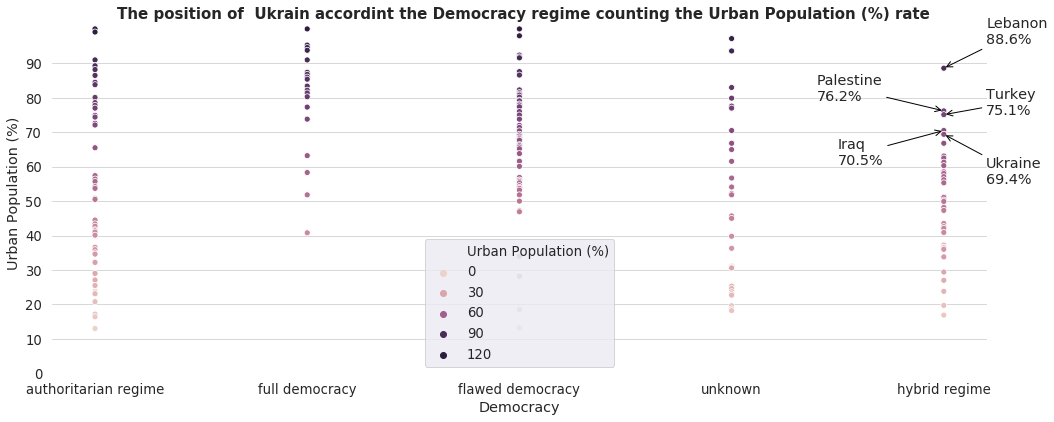

In [17]:
df_urban = df[['Country','Democracy','Urban Population (%)']].sort_values(["Urban Population (%)"],
                                                               ascending = (False))
fig, ax = plt.subplots(figsize=(15, 6))
fig.suptitle("The position of  Ukrain accordint the Democracy regime counting the Urban Population (%) rate",
             fontsize=15, fontweight='bold')
g = sns.scatterplot(x='Democracy', y='Urban Population (%)', hue='Urban Population (%)',data=df_urban)
ax.annotate("Ukraine\n69.4%", 
            xy=(4, 69.4),xytext=(4.2, 55),
            arrowprops=dict(arrowstyle="->",color='black' ,connectionstyle="arc3"));
ax.annotate("Lebanon\n88.6%", 
            xy=(4, 88.6),xytext=(4.2, 95.6),
            arrowprops=dict(arrowstyle="->",color='black' ,connectionstyle="arc3"));
ax.annotate("Palestine\n76.2%", 
            xy=(4, 76.2),xytext=(3.4, 79.2),
            arrowprops=dict(arrowstyle="->",color='black' ,connectionstyle="arc3"));
ax.annotate("Turkey\n75.1%", 
            xy=(4, 75.1),xytext=(4.2, 75.1),
            arrowprops=dict(arrowstyle="->",color='black' ,connectionstyle="arc3"));
ax.annotate("Iraq\n70.5%", 
            xy=(4, 70.5),xytext=(3.5, 60.5),
            arrowprops=dict(arrowstyle="->",color='black' ,connectionstyle="arc3"));

plt.tight_layout()
ax.yaxis.set_ticks(np.arange(0, 100, 10))
plt.grid(axis='y',which='major',color='grey', alpha=0.3)
plt.box(on=None)
plt.show()


    Well, here is very clear, that `Ukraine` takes the 5th place in top 5 countries with the highest pecent of `urban population` and the `hybrid regime` of `Democracy`. 
A `hybrid regime` is a mixed type of political regime that arises on the basis of an authoritarian as a result of an incomplete democratic transition. `Hybrid regimes` combine autocratic features with democratic ones, they can simultaneously hold political repressions and regular elections, what exactly we can see inside Ukraine.

And `Urban population` generally refers to the population inhabiting areas that have a greater population density than rural areas and are overall more compact than rural areas. But the Ukrainian economy despite the high `urban population indicator` is very strongly tied to the agricultural sector.

At first we will change the name of feature for more common use

In [18]:
df.rename(columns={'Inequality Index': 'inequality_index'}, inplace=True) 

It will be realy interesting to look at all not colonized population countries and theirs nowadays Inequality Index

Let's make a new binary feature `is_colonizer`, it will tell us 0 if the countri wasn't colonized and 1 if it was

In [19]:
df['is_colonizer'] = 1
df.loc[df['Colonizer'] == 'None','is_colonizer'] = 0

Good, we have now 63 countries which are not colonized

Let's sort the table in ascending orde by `Inequality Index`

In [20]:
non_colonized = df[df.is_colonizer==0]

In [21]:
non_colonized_10= non_colonized.sort_values(["inequality_index"], ascending =True)[:10]

Let's check what we got in the table

In [22]:
non_colonized_10[:10]

,Index,Country,Population,Zone,Colonizer,Civil Freedom,Press Freedom,Democracy,Urban Population (%),Immigrants (Ratio),Emigrants (Ratio),GDP PP/C,Unemployment,inequality_index,PPP,Homicide rate,HDI,tax_to_profit_persent,is_colonizer
176,176,UKRAINE,44222947,Eastern Europe & Central Asia,None,partly free,noticeable problems,hybrid regime,69.40,0.11,0.12,9283.0,9.7,25.5,4.07,6.34,0.75,41.7,0
151,151,SLOVENIA,2079976,Eastern Europe & Central Asia,None,free,satisfactory situation,flawed democracy,54.50,0.11,0.06,36746.0,5.2,25.7,7.63,0.48,0.90,31.0,0
44,44,CZECH REPUBLIC,10618303,Eastern Europe & Central Asia,None,free,satisfactory situation,flawed democracy,73.80,0.04,0.08,37371.0,1.9,25.9,5.13,0.61,0.89,46.1,0
150,150,SLOVAKIA,5447662,Eastern Europe & Central Asia,None,free,satisfactory situation,flawed democracy,53.70,0.03,0.06,3513.0,6.6,26.1,5.36,1.05,0.86,49.7,0
113,113,MOLDOVA,4051212,Eastern Europe & Central Asia,None,partly free,noticeable problems,hybrid regime,42.60,0.11,0.18,7305.0,4.2,26.3,0.84,3.19,0.70,40.5,0
90,90,KOSOVO,16197458,Eastern Europe & Central Asia,None,partly free,noticeable problems,unknown,61.55,0.08,0.13,11552.0,26.5,26.5,2.99,1.60,0.80,15.2,0
86,86,KAZAKHSTAN,18204499,Eastern Europe & Central Asia,None,not free,difficult situation,authoritarian regime,57.40,0.21,0.19,2755.0,4.9,26.5,1.44,4.81,0.80,29.4,0
14,14,BELARUS,9468338,Eastern Europe & Central Asia,None,not free,difficult situation,authoritarian regime,78.60,0.12,0.14,20003.0,5.6,26.7,3.89,3.58,0.81,53.3,0
126,126,NORWAY,5305383,Western Europe,None,free,good situation,full democracy,82.20,0.14,0.04,74356.0,4.0,26.8,5.41,0.51,0.95,37.0,0
92,92,KYRGYZSTAN,6045117,Eastern Europe & Central Asia,None,partly free,noticeable problems,hybrid regime,36.40,0.05,0.11,3844.0,7.2,26.8,0.32,4.49,0.67,29.0,0


##### And now we able to plot top 10 countries with the lowest `Inequality Index`

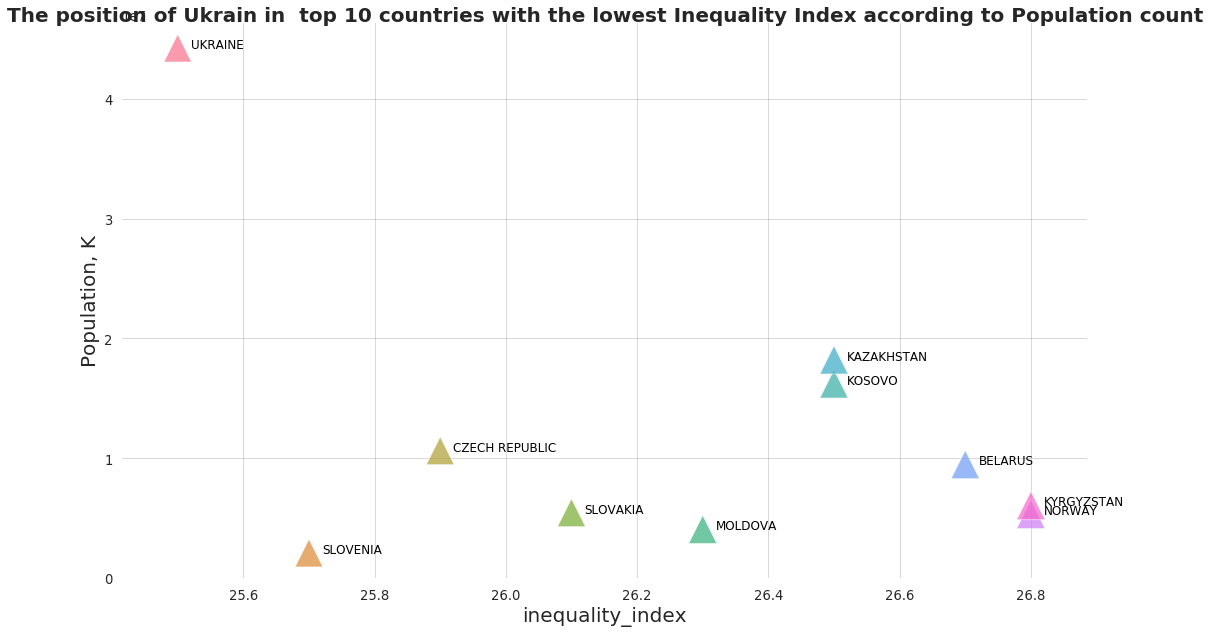

In [23]:
fig, ax = plt.subplots(figsize=(15,9))
fig.suptitle("The position of Ukrain in  top 10 countries with the lowest Inequality Index according to Population count",
             fontsize=20, fontweight='bold')
g = sns.scatterplot(y="Population",x="inequality_index",
                      hue="Country", s=non_colonized_10.inequality_index*30, marker='^',
                      data=non_colonized_10[:10], palette='husl', alpha=0.7 , legend=False)
for line in range(10):
    ax.text(non_colonized_10.inequality_index.to_list()[line]+0.02,
            non_colonized_10.Population.to_list()[line],
            non_colonized_10.Country.to_list()[line], 
             horizontalalignment='left', size='small', 
             color='black', )
plt.xlabel('inequality_index',fontsize=20)
plt.ylabel('Population, K',fontsize=20)   
plt.grid(which='major',color='grey', alpha=0.3)
plt.tight_layout()
plt.box(on=None)
plt.show()


Well, we see, That `Ukraine` has the lowest `Inequality Index`  in the world and the biggest `Population count` in this comparation of Top 10 countries with the lowest `Inequality Index`.

And also there is another interesting thing on this plot: there are mostly countries from ex USSR region, exept `Norway`

Inequality Index: Gini coefficient, is a measure of statistical dispersion intended to represent the income or wealth distribution of a nation's residents, and is the most commonly used measurement of inequality.


Exactly because of such pointers and statistics in real life, in Ukraine, it is very and very hard to have  a normal level of live. It is a very low  quality of live